In [7]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import scipy.stats as stats

import scipy

import time
from sklearn.decomposition import PCA
from sklearn import decomposition


from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors, cross_validation

from matplotlib.colors import ListedColormap

import statsmodels.api as sm
from sklearn import linear_model

from matplotlib import style 
style.use('ggplot')

from sklearn.cluster import KMeans


In [16]:
data = pd.DataFrame.from_csv("/Users/raphaelpresberg/Desktop/Stevens/BIA 652 Multivariate Data Analysis/NYC_Taxis/NYC_taxis.csv")


#data understanding
data.head()
data.tail(10)
sLength = len(data['Pickup Time'])
data['Trip time'] = pd.Series(np.random.randn(sLength), index = data.index)
data['new_col'] = range(0, sLength)
data = data.reset_index()
data['new_col'] = data.index
print(data.head())
data.info()
data.describe()



  Pickup Date  Pickup Time  Dropoff Date Dropoff Time Vendor ID  \
0  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
1  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
2  2015-01-01  0:00:00.000      20150101  0:11:26.000       CMT   
3  2015-01-01  0:00:01.000      20150101  0:03:49.000       CMT   
4  2015-01-01  0:00:03.000      20150101  0:10:50.000       VTS   

   Passenger Count  Trip Distance (in miles)  Pickup Longitude  \
0                1                      1.68        -73.991547   
1                3                      1.56        -74.001320   
2                5                      4.00        -73.971436   
3                1                      0.80        -73.860847   
4                1                      1.58        -73.987579   

   Pickup Latitude  Rate Code   ...    Dropoff Latitude  Payment Type  \
0        40.750069          1   ...            0.000000           CSH   
1        40.729057          1   ...           40.71966

,Dropoff Date,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,Dropoff Longitude,Dropoff Latitude,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time,new_col
count,7.273100e+05,727310.000000,7.273100e+05,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.00000
mean,2.015010e+07,1.783453,1.959882e+01,-72.425570,39.897802,1.045149,-72.440314,39.907709,12.417926,0.329787,0.497078,1.280769,0.258895,15.081973,-0.000656,363654.50000
std,5.124534e-01,1.361950,1.407088e+04,10.585702,5.831541,0.628995,10.535020,5.824130,11.253458,0.344260,0.040088,2.473669,1.307798,13.160194,0.999942,209956.45648
min,2.015010e+07,0.000000,0.000000e+00,-79.732277,0.000000,1.000000,-77.459442,-9.029157,-100.000000,-1.000000,-0.500000,-92.420000,-8.000000,-100.300000,-4.656511,0.00000
25%,2.015010e+07,1.000000,1.090000e+00,-73.991249,40.733257,1.000000,-73.990837,40.732002,6.500000,0.000000,0.500000,0.000000,0.000000,8.000000,-0.676223,181827.25000
50%,2.015010e+07,1.000000,1.830000e+00,-73.981209,40.752293,1.000000,-73.979294,40.752449,9.000000,0.500000,0.500000,0.000000,0.000000,11.150000,-0.001807,363654.50000
75%,2.015010e+07,2.000000,3.440000e+00,-73.965103,40.767391,1.000000,-73.959824,40.768417,14.000000,0.500000,0.500000,1.950000,0.000000,16.800000,0.673009,545481.75000
max,2.015012e+07,9.000000,1.200000e+07,0.000000,50.769863,99.000000,85.274025,459.533325,3005.500000,9.000000,0.500000,850.000000,89.750000,3006.350000,4.511502,727309.00000


# Outliers

In [3]:

def basics_info (initial_numpy_array):
    print("Mean: ", np.mean(initial_numpy_array))
    #median cost of a trip without @ without taxes
    print("Median: ", np.median(initial_numpy_array))
    #The numpy.ptp() function returns the range (maximum-minimum) of values along an axis.
    print("Range: ", np.ptp(initial_numpy_array))
    #standard deviation & variance
    print("SD: ", np.std(initial_numpy_array))
    print("Variance: ", np.var(initial_numpy_array))
    plt.plot(initial_numpy_array)
    plt.show() 


#removing outliers and compute the distribution plot

def removeOutliers(x):
    a = np.array(x)
    outlierConstant = 1
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

def prob_plot(variable):
    
    mu = np.mean(variable)
    sigma = np.std(variable)

    mu, sigma = mu, sigma
    x = mu + sigma * np.array(variable)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


    plt.xlabel("Prob ")
    plt.ylabel('Probability')
    plt.title('Proba Plot')
   # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([20, 190, 0, 0.03])
    plt.grid(True)
    plt.show()
    

def prob_plot_trip_distance(variable):
    
    mu = np.mean(variable)
    sigma = np.std(variable)

    mu, sigma = mu, sigma
    x = mu + sigma * np.array(variable)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


    plt.xlabel("Prob ")
    plt.ylabel('Probability')
    plt.title('Proba Plot')
   # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([0, 11, 0, 0.6])
    plt.grid(True)
    plt.show()
    

    



Mean:  13.071831242
Median:  11.8
Range:  28.7
SD:  5.9182842223
Variance:  35.0260881359


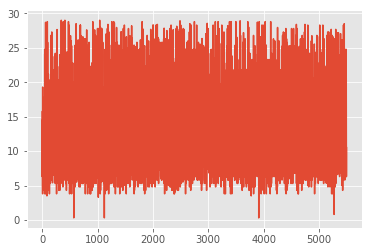

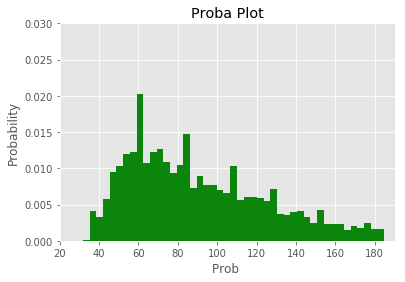

In [15]:
#*******************************************
#STUDY FOR TOTAL AMOUNT 
#*******************************************
total_amount = data.as_matrix(columns = data.columns[19:20])

#basics_info(total_amount)
good_total_amount = removeOutliers(total_amount)
basics_info(good_total_amount)
prob_plot(good_total_amount)


Mean:  72734.2243413
Median:  1.3
Range:  727409.3
SD:  173132.84601
Variance:  29974982367.4


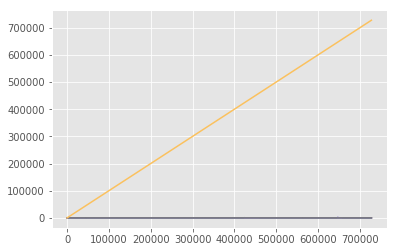

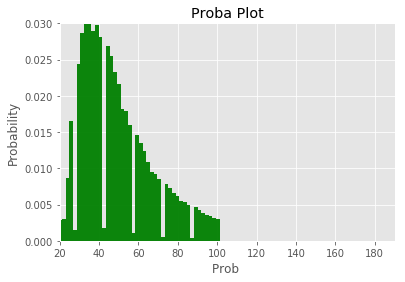

In [8]:
#*******************************************
#STUDY FOR FARE AMOUNT 
#*******************************************

fare_amount = data.as_matrix(columns=data.columns[17:118])

basics_info(fare_amount)
good_fair_amount = removeOutliers(data[['Fare Amount']])
prob_plot(good_fair_amount)


Mean:  12.4179262625
Median:  9.0
Range:  3105.5
SD:  11.2534498698
Variance:  126.640133973


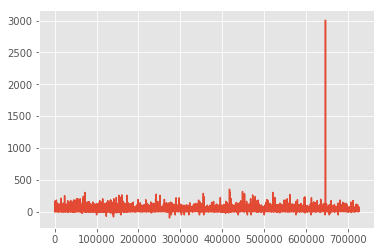

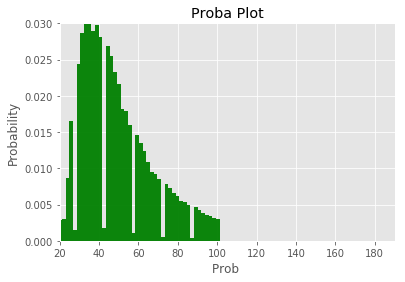

In [30]:
#*******************************************
#STUDY FOR TIP AMOUNT 
#*******************************************

tip_amount = data.as_matrix(columns=data.columns[14:15])

basics_info(tip_amount)
good_tip_amount = removeOutliers(tip_amount)
prob_plot(good_tip_amount)


count    727310.000000
mean          1.783453
std           1.361950
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: Passenger Count, dtype: float64
Mean:  1.78345272305
Median:  1.0
Range:  9
SD:  1.3619492225
Variance:  1.85490568468


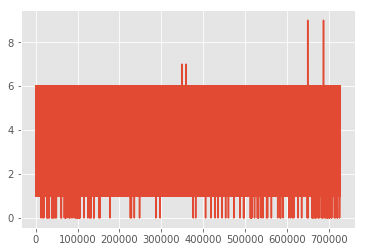

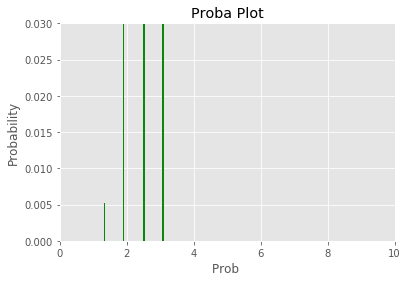

In [57]:
#*******************************************
#STUDY FOR PASSENGER COUNT
#*******************************************

passenger_count = data.as_matrix(columns=data.columns[5:6])

print(data['Passenger Count'].describe())
basics_info(passenger_count)
good_passenger_count = removeOutliers(passenger_count)
#prob_plot_passenger_count(good_passenger_count)



Mean:  3.00785833333
Median:  2.05
Range:  32.9
SD:  3.04313381729
Variance:  9.26066342993


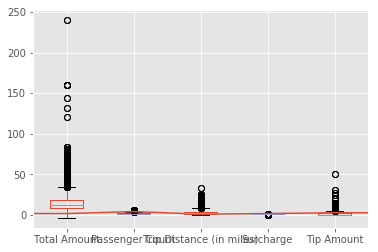

None


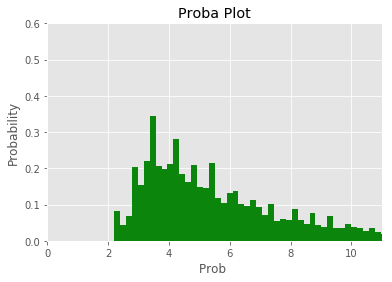

In [25]:
#*******************************************
#STUDY FOR TRIP DISTANCE
#*******************************************


trip_distance = data.as_matrix(columns=data.columns[6:7])


#print(data["Trip Distance (in miles)"].describe())
print(basics_info(trip_distance))
good_trip_distance = removeOutliers(trip_distance)
#basics_info(good_trip_distance)
prob_plot_trip_distance(good_trip_distance)


In [ ]:
# OUTLIERS 2 methods
# ==> IQR
# ==> Z-score


# PCA

In [11]:
#a = pickup time
#b = dropoff time
a = data.as_matrix(columns=data.columns[0:1])
b = data.as_matrix(columns=data.columns[2:3])
c = "0:00:00.000"
a
#x = a[0]
c.split(':')


#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9

['0', '00', '00.000']

In [4]:
list(data)

['Pickup Date',
 'Pickup Time',
 'Dropoff Date',
 'Dropoff Time',
 'Vendor ID',
 'Passenger Count',
 'Trip Distance (in miles)',
 'Pickup Longitude',
 'Pickup Latitude',
 'Rate Code',
 'Store and Forward Flag',
 'Dropoff Longitude',
 'Dropoff Latitude',
 'Payment Type',
 'Fare Amount',
 'Surcharge',
 'MTA Tax',
 'Tip Amount',
 'Tolls Amount',
 'Total Amount',
 'Trip time',
 'new_col']

In [19]:
#Tip Analysis 
#Question: generous/not generous customer

#variable to use ==> total amount, passenger count, trip distance, rate code, surcharge
#Output ==> tip amount

data =data.iloc[:6000,]

tip_data = data[ ['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount']]
tip_data
tip_data.describe()

#Creating train and test dataset (2/3 - 1/3)
#msk = np.random.rand(len(tip_data)) < 0.66
#tip_train = tip_data[msk]
#tip_test = tip_data[~msk]
tip_train = tip_data.iloc[:2000,]
tip_test = tip_data.iloc[2001:, ]
tip_data

#2 categories to classify ==> Not Generous, Generous

#tip_data.info()
#tip_data.head()
#tip_data.tail()
#tip_test


,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Tip Amount
0,10.80,1,1.68,0.0,0.00
1,8.80,3,1.56,0.5,0.00
2,14.50,5,4.00,0.5,0.00
3,6.30,1,0.80,0.5,0.00
4,12.20,1,1.58,0.5,1.90
5,15.80,2,2.57,0.5,0.00
6,11.80,3,2.50,0.5,0.00
7,11.80,2,1.30,0.5,2.00
8,3.80,2,0.00,0.5,0.00
9,19.30,3,5.62,0.5,0.00


# Multiple Regression 

In [17]:
#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

#***************************************************************************************************************
#Multiple Regression 
#***************************************************************************************************************


# WITH STATSMODELS

target = pd.DataFrame(tip_data[['Tip Amount']])

df = pd.DataFrame(tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']])

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']]
y = target["Tip Amount"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

#Analysis: R^2 = 0.535 means this model explain only 53,5% of the variance in our dependent variable


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Tip Amount   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1723.
Date:                Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:55:55   Log-Likelihood:                -11788.
No. Observations:                6000   AIC:                         2.358e+04
Df Residuals:                    5996   BIC:                         2.361e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total Amount                 0.1565      0.003     46.938      0.000       0.150       0.163
Passenger Count             -0.0561      0.017     -3.352      0.001      -0.089      -0.023
Trip Distance (in miles)    -0.2277      0.013    -17.766      0.000      -0.253      -0.203
Surcharge                   -0.6139      0.091     -6.717      0.000      -0.793      -0.435
==============================================================================
Omnibus:                     1704.838   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203573.075
Skew:                          -0.136   Prob(JB):                         0.00
Kurtosis:                      31.535   Cond. No.                         81.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# WITH SCICKIT

#target = tip_data[['Tip Amount']]

#df =tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
#X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
#y = target["Tip Amount"]


X = tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
y = tip_data["Tip Amount"]



lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)

print("prediction", predictions)

# percentage of explained variance of the predictions
print("R^2 (percentage of variance): " ,lm.score(X,y))

#coefficients for the predictors
print("coef: ", lm.coef_)

# intercept for the predictors
print("intercept", lm.intercept_)



prediction [-0.64530355  0.50263904  0.77589734 ...,  0.30650177  0.42469692
  0.94536259]
R^2 (percentage of variance):  0.366979581066
coef:  [ 0.17142051 -0.04270531 -0.25345408  3.09155949]
intercept -2.02813685405


In [19]:
#Test prediction of multiple regression

test_prediction = np.array([12, 2, 3,  0])
test_prediction = test_prediction.reshape(1, -1)

lm.predict(test_prediction)



array([-0.81686365])

# Classification ==> KNN Algo


In [12]:

#***************************************************************************************************************
#Loop to create factors based on a column
#***************************************************************************************************************


#dt_test = tip_data.ix[[0, 1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                      #['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount']]

a = tip_data.as_matrix(columns = tip_data.columns[4:5])

tip_data["Generous ?"] = ""

i=0
for i in range(0,6000) :
    
    if a[i]== 0:
        tip_data.ix[[i],["Generous ?"]] = "Not Generous"
        
    else:
        tip_data.ix[[i],["Generous ?"]] = "Generous"
tip_data

dt = tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Generous ?']]
dt

#0 ==> NOT GENEROUS
#1 ==> GENEROUS


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Generous ?
0,10.80,1,1.68,0.0,Not Generous
1,8.80,3,1.56,0.5,Not Generous
2,14.50,5,4.00,0.5,Not Generous
3,6.30,1,0.80,0.5,Not Generous
4,12.20,1,1.58,0.5,Generous
5,15.80,2,2.57,0.5,Not Generous
6,11.80,3,2.50,0.5,Not Generous
7,11.80,2,1.30,0.5,Generous
8,3.80,2,0.00,0.5,Not Generous
9,19.30,3,5.62,0.5,Not Generous


In [20]:
#***************************************************************************************************************
#Classification ==> KNN Algo
#***************************************************************************************************************

X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']])
y = np.array(dt['Generous ?'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test)
accuracy




0.75249999999999995

In [21]:
#count how many Generous and not generous 
dt['Generous ?']

0       Not Generous
1       Not Generous
2       Not Generous
3       Not Generous
4           Generous
5       Not Generous
6       Not Generous
7           Generous
8       Not Generous
9       Not Generous
10      Not Generous
11          Generous
12      Not Generous
13      Not Generous
14      Not Generous
15          Generous
16      Not Generous
17      Not Generous
18          Generous
19      Not Generous
20      Not Generous
21      Not Generous
22      Not Generous
23      Not Generous
24      Not Generous
25      Not Generous
26      Not Generous
27          Generous
28          Generous
29          Generous
            ...     
5970    Not Generous
5971    Not Generous
5972    Not Generous
5973        Generous
5974        Generous
5975    Not Generous
5976    Not Generous
5977        Generous
5978    Not Generous
5979    Not Generous
5980        Generous
5981    Not Generous
5982        Generous
5983        Generous
5984    Not Generous
5985        Generous
5986    Not G

In [57]:
#Test prediction for KNN
#Must use Dummy variables 

example = np.array([12, 4, 2, 0])
example = example.reshape(1, -1)

prediction = clf.predict(example)
prediction

array(['Generous'], dtype=object)

# Clustering ==> KMeans


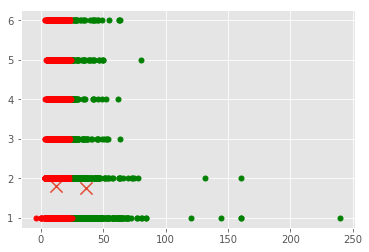

labels : [1 1 1 ..., 1 1 1]
centroids : [[ 36.51033666   1.75685786   8.76254364   0.46882793]
 [ 12.28542516   1.80819546   2.1199673    0.49865333]]


In [22]:


X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']])
y = np.array(dt['Generous ?'])

clf = KMeans(n_clusters= 2)
clf.fit(X,y)

centroids = clf.cluster_centers_
labels = clf.labels_


colors = ["g.", "r.", "b."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i,1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidths = 5)   
plt.show()


print("labels :", labels)
print("centroids :", centroids)


# PCA

In [2]:
pca = decomposition.PCA(n_components=2)
pca.fit(dt)

X = pca.transform(dt)
X

NameError: name 'dt' is not defined

In [13]:
df = pd.DataFrame(np.random.randn(100, 3))
df

,0,1,2
0,-0.173911,0.118028,0.734856
1,0.622159,-1.004575,-0.203553
2,-0.985863,-0.867586,-0.123364
3,0.698662,-1.246252,0.009075
4,0.398221,-0.157829,1.753956
5,-0.058229,-0.308101,0.706693
6,0.153199,-1.065074,0.871002
7,0.379740,1.032817,0.974079
8,1.273335,1.619768,0.556074
9,0.259678,-0.426949,-0.649513


In [15]:

new_dt = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
new_dt.reset_index()

,index,0,1,2
0,0,-0.173911,0.118028,0.734856
1,1,0.622159,-1.004575,-0.203553
2,2,-0.985863,-0.867586,-0.123364
3,3,0.698662,-1.246252,0.009075
4,4,0.398221,-0.157829,1.753956
5,5,-0.058229,-0.308101,0.706693
6,6,0.153199,-1.065074,0.871002
7,7,0.379740,1.032817,0.974079
8,8,1.273335,1.619768,0.556074
9,9,0.259678,-0.426949,-0.649513
